# Optimal Transport and Wasserstein Distances

The goal of presentation is to introduce optimal transport (OT) using the Python library POT (Python Optimal Transport.
Then we will use optimal transport in color transfer application.

To install the package POT:
* Install with pip: ```pip install pot```
* Install with conda: ```conda install -c conda-forge pot ```

## 1. Solving Exact OT: Linear Programming

Optimal Transport is a theory that allows us to compare two (weighted) points clouds $(X, a)$ and $(Y, b)$, where $X \in \mathbb{R}^{n \times d}$ and $Y \in \mathbb{R}^{m \times d}$ are the locations of the $n$ (resp. $m$) points in dimension $d$, and $a \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ are the weights. We ask that the total weights sum to one, i.e. $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j = 1$.

The basic idea of Optimal Transport is to "transport" the mass located at points $X$ to the mass located at points $Y$.

Let us denote by $\mathcal{U}(a,b) = \left\{ P \in \mathbb{R}^{n \times m} \,|\, P \geq 0, \sum_{j=1}^m P_{ij} = a_i, \sum_{i=1}^n P_{ij} = b_j\right\}$ the set of admissible transport plans.

If $P \in \mathcal{U}(a,b)$, the quantity $P_{ij} \geq 0$ should be regarded as the mass transported from point $X_i$ to point $Y_j$. For this reason, it is called a *transport plan*.

We will also consider a *cost matrix* $C \in \mathbb{R}^{n \times m}$. The quantity $C_{ij}$ should be regarded as the cost paid for transporting one unit of mass from $X_i$ to $Y_j$. This cost is usually computed using the positions $X_i$ and $Y_j$, for example $C_{ij} = \|X_i - Y_j\|$ or $C_{ij} = \|X_i - Y_j\|^2$.

Then transporting mass according to $P \in \mathcal{U}(a,b)$ has a total cost of $\sum_{ij} P_{ij} C_{ij}$.

In "Optimal Transport", there is the word _Optimal_. Indeed, we want to find a transport plan $P \in \mathcal{U}(a,b)$ that will minimize its total cost. In other words, we want to solve
$$
    \min_{P \in \mathcal{U}(a,b)} \sum_{ij} C_{ij }P_{ij}.
$$

This problem is a Linear Program: the objective function is linear in the variable $P$, and the constraints are linear in $P$. We can thus solve this problem using classical Linear Programming algorithms, such as the simplex algorithm.

If $P^*$ is a solution to the Optimal Transport problem, we will say that $P^*$ is an optimal transport plan between $(X, a)$ and $(Y, b)$, and that $\sum_{ij} P^*_{ij} C_{ij}$ is the optimal transport distance between $(X, a)$ and $(Y, b)$: it is the minimal amount of "energy" that is necessary to transport the initial mass located at points $X$ to the target mass lcoated at points $Y$.

### Computing Optimal "Croissant" Transport using POT

We will solve the Bakery/Cafés problem of transporting croissants from a number of Bakeries to Cafés.

We use fictional positions, production and sale numbers (that both sum to the same value).

We have acess to the position of Bakeries $X \in \mathbb{R}^{8 \times 2}$ and their respective production $a \in \mathbb{R}^8$ which describe the source point cloud. The Cafés where the croissants are sold are defined by their position $Y \in \mathbb{R}^{5 \times 2}$ and $b \in \mathbb{R}^{5}$.

In [251]:
import ot
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[184., 201.],
       [449. , 168.],
       [245., 288.],
       [273., 364.],
       [494., 336. ],
       [738., 238.],
       [736., 375.],
       [537., 482.]])
Y=np.array([[302., 442.],
       [345. , 368.],
       [449.  , 201.],
       [454., 387.],
       [627., 408. ]])
a = np.array([30., 48.0, 50., 30., 40., 40., 89., 73.])
b = np.array([81., 80., 90., 58., 91.])

print('Bakery productions =', a)
print('Café sales =', b)
print('Total number of croissants =', a.sum())
print('Total number Café sales =', b.sum())

Bakery productions = [30. 48. 50. 30. 40. 40. 89. 73.]
Café sales = [81. 80. 90. 58. 91.]
Total number of croissants = 400.0
Total number Café sales = 400.0


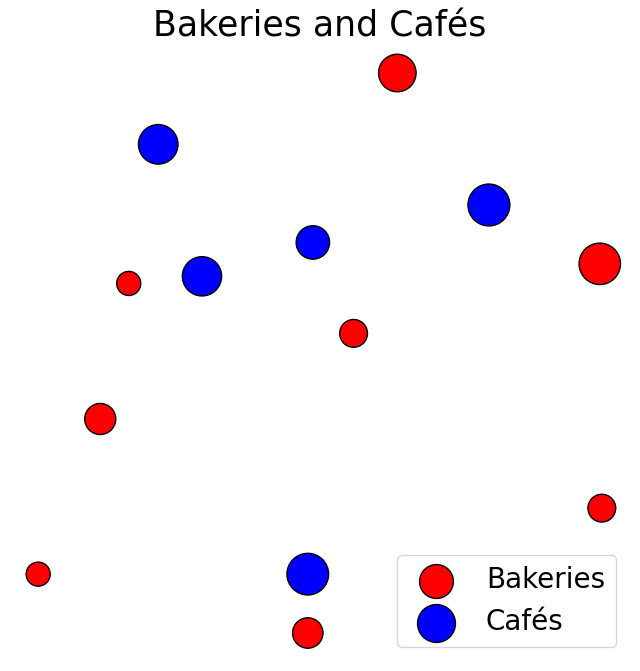

In [252]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
plt.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Bakeries and Cafés', fontsize=25)
plt.show()

Let us now compute the cost matrix $C \in \mathbb{R}^{n \times m}$. Here, we will use two different costs: $\ell_1$ and $\ell_2$ costs.

In [248]:
C_1 = np.zeros((8,5))
C_2 = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        C_1[i,j] = np.linalg.norm(X[i]-Y[j])
        C_2[i,j] = C_1[i,j]**2

We can now compute the Optimal Transport plan to transport the croissants from the bakeries to the cafés, for the two different costs.

In [197]:
optimal_plan_1 = ot.emd(a, b, C_1)
print(optimal_plan_1)
optimal_cost_1 = np.sum(optimal_plan_1*C_1)
print('1-Wasserstein distance =', optimal_cost_1)
print('')

optimal_plan_2 = ot.emd(a, b, C_2)
print(optimal_plan_2)
optimal_cost_2 = np.sum(optimal_plan_2*C_2)
print('2-Wasserstein distance =', np.sqrt(optimal_cost_2))

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [25. 57.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [27.  0.  0. 46.  0.]]
1-Wasserstein distance = 61523.1597137715

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [52. 30.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0. 27.  0. 13.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [ 0.  0.  0. 73.  0.]]
2-Wasserstein distance = 3292.1390326139353


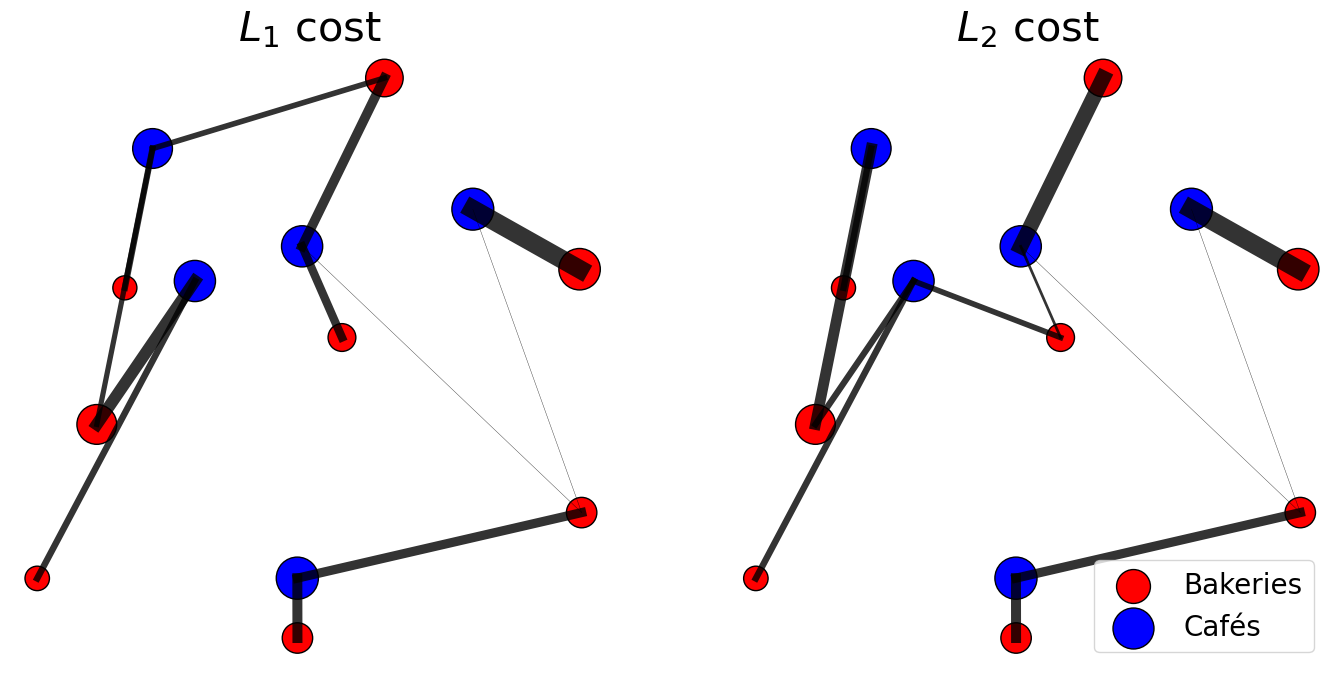

In [198]:
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_1[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$L_1$ cost', fontsize=30)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_2[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$L_2$ cost', fontsize=30)

plt.legend(fontsize=20)
plt.show()

## 2. Sinkhorn Algorithm for Entropy Regularized Optimal Transport

### Reminders on Sinkhorn Algorithm

In real applications, and especially in Machine Learning, we often have to deal with huge numbers of points. In this case, the linear programming algorithms which have cubic complexity will take too much time to run.

That's why in practise, among other reasons, people minimize another criterion given by
$$
    \min_{P \in \mathcal{U}(a,b)} \langle C, P \rangle + \epsilon \sum_{ij} P_{ij} [ \log(P_{ij}) - 1].
$$
When $\epsilon$ is sufficiently small, we can consider that a solution to the above problem (often refered to as "Entropy-regularized Optimal Transport") is a good approximation of a real optimal transport plan.

In order to solve this problem, one can remark that the optimality conditions imply that a solution $P_\epsilon^*$ necessarily is of the form $P_\epsilon^* = \text{diag}(u) \, K \, \text{diag}(v)$, where $K = \exp(-C/\epsilon)$ and $u,v$ are two non-negative vectors.

$P_\epsilon^*$ should verify the constraints, i.e. $P_\epsilon^* \in \mathcal{U}(a,b)$, so that
$$
    P_\epsilon^* 1_m = a \text{  and  } (P_\epsilon^*)^T 1_n = b
$$
which can be rewritten as
$$
    u \odot (Kv) = a \text{  and  } v \odot (K^T u) = b
$$

Then Sinkhorn's algorithm alternate between the resolution of these two equations, and reads
$$
    u \leftarrow \frac{a}{Kv} \text{  and  } v \leftarrow \frac{b}{K^T u}
$$

In [199]:
def sinkhorn(a, b, C, epsilon=0.1, max_iters=100):
    """Run Sinnkhorn's algorithm"""
    
    # Compute the kernel matrix K
    K = np.exp(-C/epsilon)
    
    # Alternate projections
    v = np.ones(b.shape[0])
    for _ in range(max_iters):
        u = a / K.dot(v)
        v = b / K.T.dot(u)
    
    return np.diag(u).dot(K).dot(np.diag(v))

In [20]:
np.round(sinkhorn(a, b, C_2/C_2.max(), epsilon=0.01), 2)

array([[ 1.75, 29.67,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 47.29,  0.  ,  0.  ],
       [48.9 , 34.25,  0.  ,  0.  ,  0.  ],
       [29.93,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.09, 23.37,  1.5 , 15.54,  0.  ],
       [ 0.  ,  0.  , 43.21,  0.  ,  4.05],
       [ 0.  ,  0.  ,  0.  ,  0.  , 86.95],
       [ 1.33,  0.2 ,  0.  , 72.46,  0.  ]])

In [13]:
optimal_plan_2

array([[ 0., 31.,  0.,  0.,  0.],
       [ 0.,  0., 48.,  0.,  0.],
       [52., 30.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  0.],
       [ 0., 27.,  0., 13.,  0.],
       [ 0.,  0., 44.,  2.,  2.],
       [ 0.,  0.,  0.,  0., 89.],
       [ 0.,  0.,  0., 73.,  0.]])

In [14]:
optimal_plan_1

array([[ 0., 31.,  0.,  0.,  0.],
       [ 0.,  0., 48.,  0.,  0.],
       [25., 57.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 40.,  0.],
       [ 0.,  0., 44.,  2.,  2.],
       [ 0.,  0.,  0.,  0., 89.],
       [27.,  0.,  0., 46.,  0.]])

We first show that this algorithm is consistent with classical optimal transport, using the "croissant" transport example.

In [21]:
plan_diff = []
distance_diff = []
for epsilon in np.linspace(0.01, 1, 100):
    optimal_plan_sinkhorn = sinkhorn(a, b, C_2/C_2.max(), epsilon)
    optimal_cost_sinkhorn = np.sum(optimal_plan_sinkhorn*C_2)
    plan_diff.append(np.linalg.norm(optimal_plan_sinkhorn-optimal_plan_2)/b.sum())
    distance_diff.append(100*np.abs(optimal_cost_sinkhorn-optimal_cost_2)/optimal_cost_2)

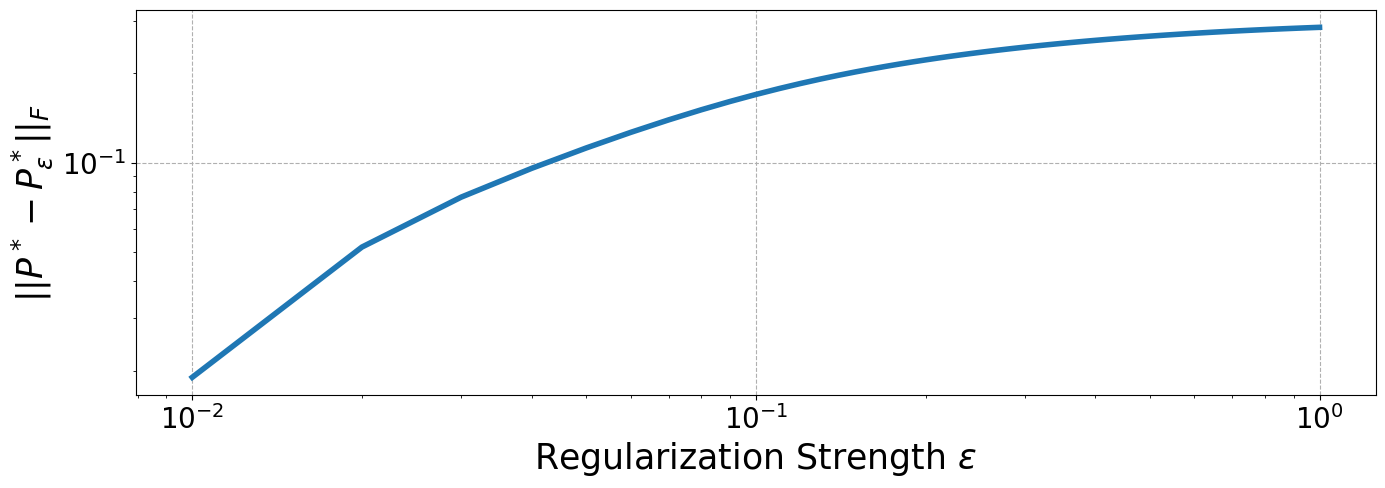

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
plt.loglog(np.linspace(0.01, 1, 100), plan_diff, lw=4)
plt.xlabel('Regularization Strength $ \epsilon $', fontsize=25)
plt.ylabel('$||P^* - P_\epsilon^*||_F$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(ls='--')
plt.show()

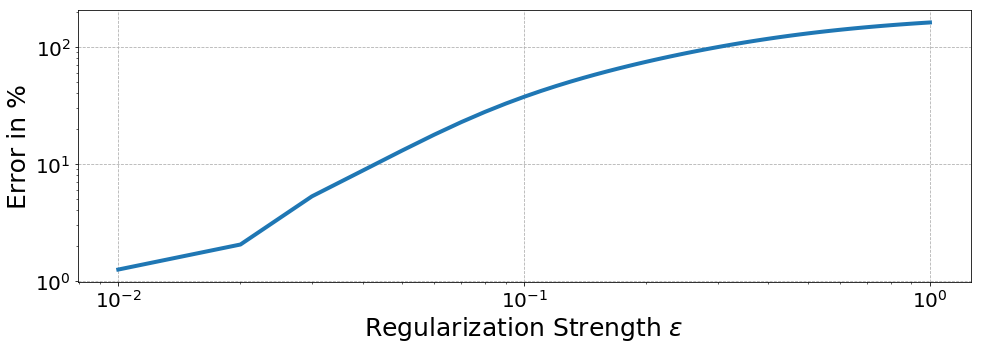

In [13]:
plt.figure(figsize=(16,5))
plt.loglog(np.linspace(0.01, 1, 100), distance_diff, lw=4)
plt.xlabel('Regularization Strength $\epsilon$', fontsize=25)
plt.ylabel('Error in %', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(ls='--')
plt.show()

## 1. Color Transfer

Given a source and a target image, the goal of color transfer is to transform the colors of the source image so that it looks similar to the target image color palette. In the end, we want to find a "color mapping", giving for each color of the source image a new color. This can be done by computing the optimal transport plan between the two images, seen as point clouds in the RGB space.

In [200]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from mpl_toolkits.mplot3d import Axes3D

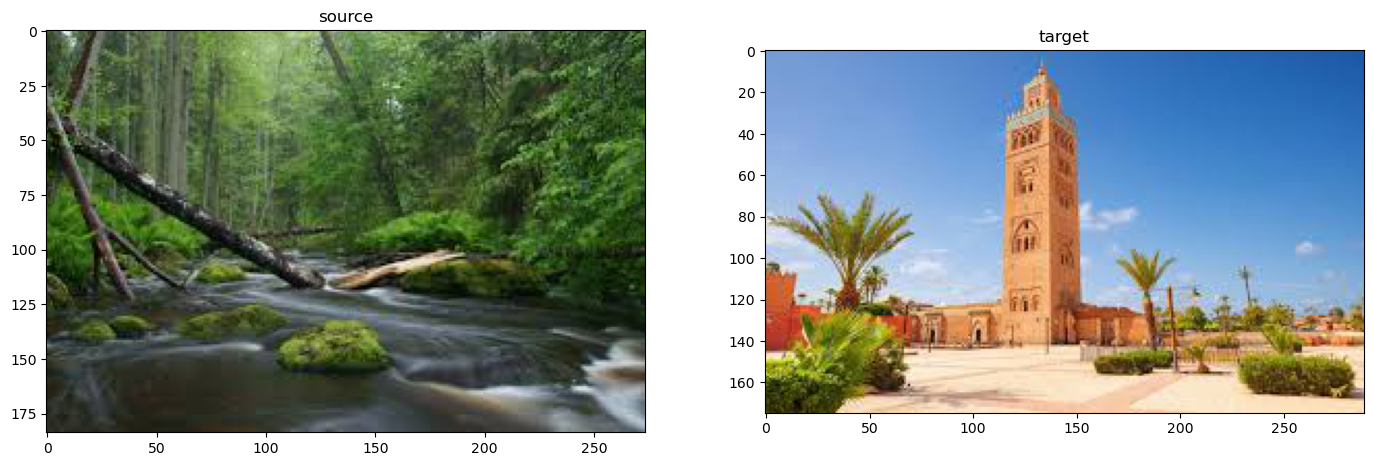

In [237]:
I1 = imread('data/nature.jpg').astype(np.float64) / 256
I2 = imread('data/marrakech.jpg').astype(np.float64) / 256

fig = plt.figure(figsize=(17, 12))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('source', fontsize=12)

ax = fig.add_subplot(1, 2, 2)
ax.imshow(I2)
ax.set_title('target', fontsize=12)

plt.show()

In [238]:
def im2mat(I):
    '''Convert image I to matrix.'''
    return I.reshape(-1,3)

def mat2im(X, shape):
    '''Convert matrix X to image with shape 'shape'.'''
    return X.reshape(shape)

X1 = im2mat(I1)
X2 = im2mat(I2)

Real images have way too many different colors, so we will need to subsample them. In order to do this, we use K-means over all the colors, and keep only the computed centroids. Note that using Mini Batch K-Means will speed the computations up.

In [239]:
from sklearn.cluster import MiniBatchKMeans

# Size of the subsampled point clouds
nbsamples = 1000

kmeans1 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X1)
X1_sampled = kmeans1.cluster_centers_

kmeans2 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X2)
X2_sampled = kmeans2.cluster_centers_

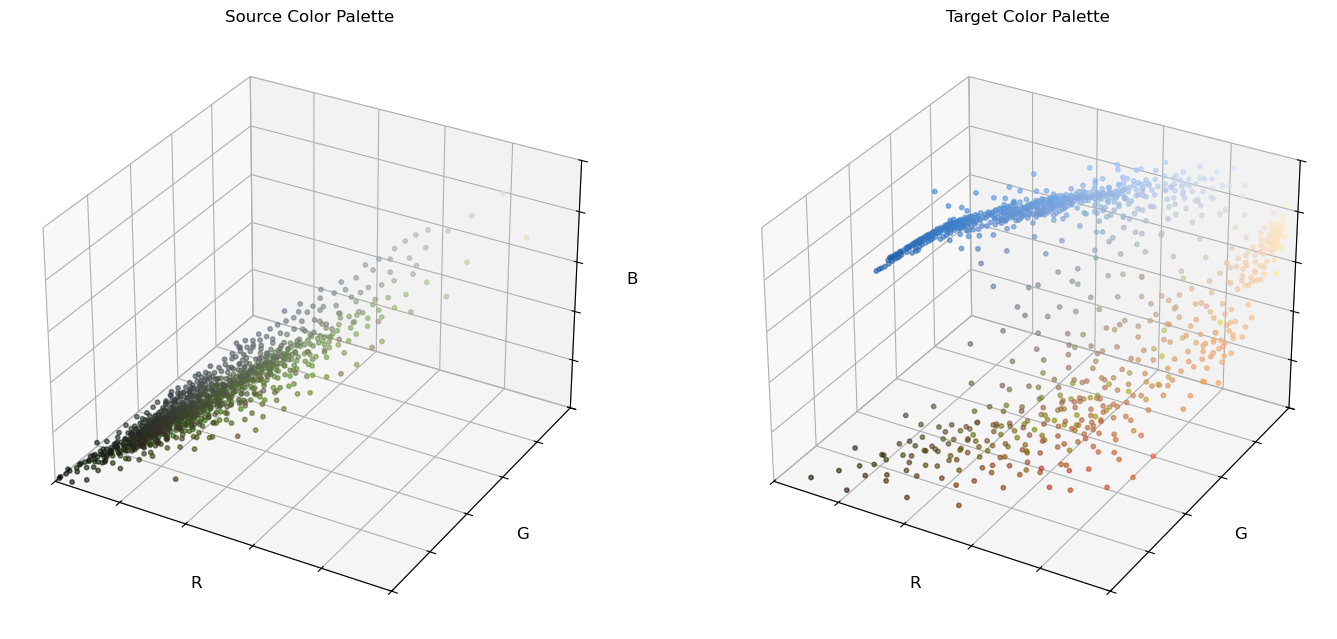

In [245]:
def showImageAsPointCloud(X, Y):
    '''Show the color palette associated with images X and Y.'''
    fig = plt.figure(figsize=(17,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=12)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=12)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=12)
    ax.set_zticklabels([])
    ax.set_title('Source Color Palette', fontsize=12)
    ax.grid('off')
    
    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], c=Y, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=12)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=12)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=12)
    ax.set_zticklabels([])
    ax.set_title('Target Color Palette', fontsize=12)
    ax.grid('off')
    
    plt.show()

showImageAsPointCloud(X1_sampled, X2_sampled)

In order to compute the optimal transport plans between the two point clouds, we have to compute the corresponding cost matrix. In the following, we will always consider the squared distance, _i.e._ $C_{ij} = \|X_i - Y_j\|^2$.

In [241]:
ones = np.ones((nbsamples,nbsamples))
XX = np.diag(np.diag(X1_sampled.dot(X1_sampled.T))).dot(ones)
YY = ones.dot(np.diag(np.diag(X2_sampled.dot(X2_sampled.T))))
XY = X1_sampled.dot(X2_sampled.T)
C = XX + YY - 2*XY

### Source with Target colors
Here, the goal is to transfer the colors of the portrait to the landscape. We will compute the exact Optimal Transport Plan, as well as the Entropy Regularized Optimal Transport plans.

In [242]:
regs = [0.01, 0.1, 0.5]
OT_plans = []
OT_plans.append(ot.emd(np.ones(nbsamples), np.ones(nbsamples), C))
for reg in regs:
    OT_plans.append(ot.sinkhorn(np.ones(nbsamples), np.ones(nbsamples), C, reg=reg))

In [243]:
def colorTransfer(OT_plan, kmeans1, kmeans2, shape):
    '''Return the color-transfered image of shape "shape".'''
    samples_transformed = OT_plan.dot(kmeans2.cluster_centers_)
    X1_transformed = samples_transformed[kmeans1.labels_]
    return mat2im(X1_transformed, shape)

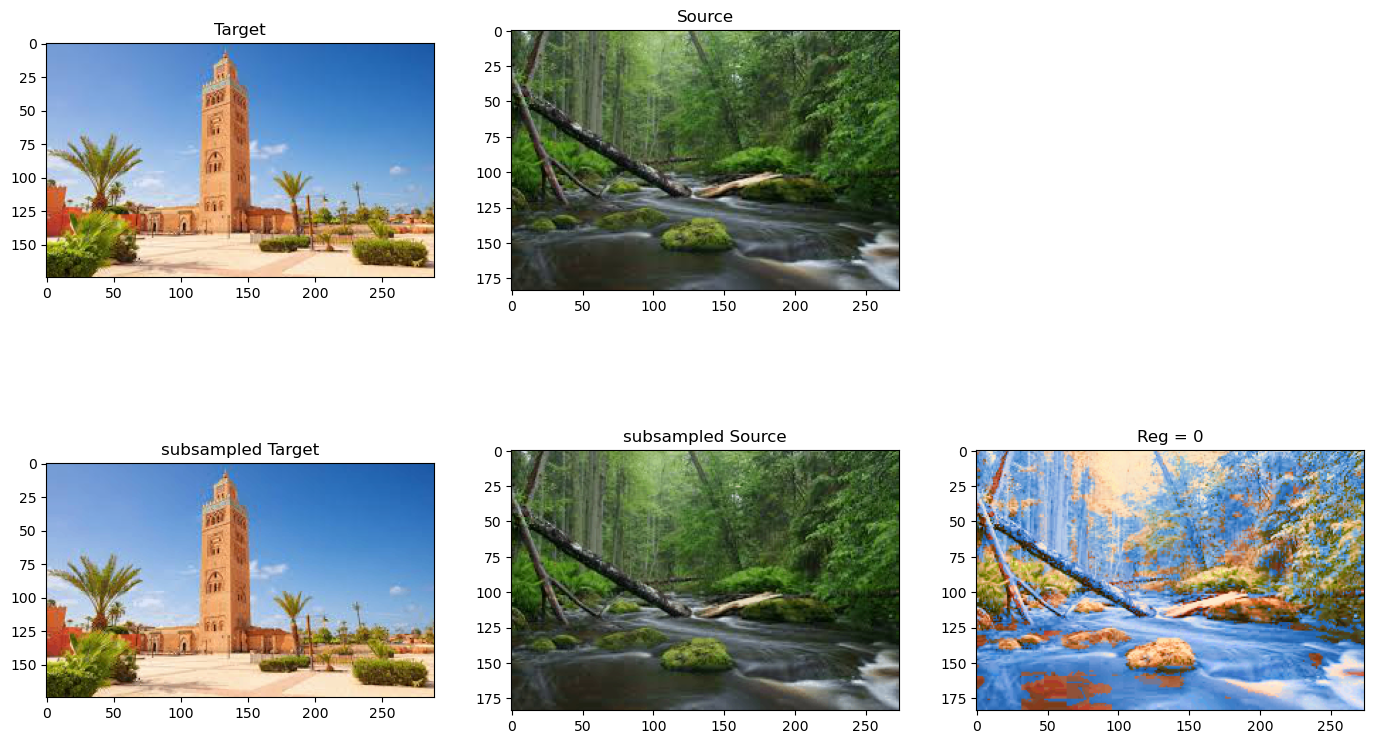

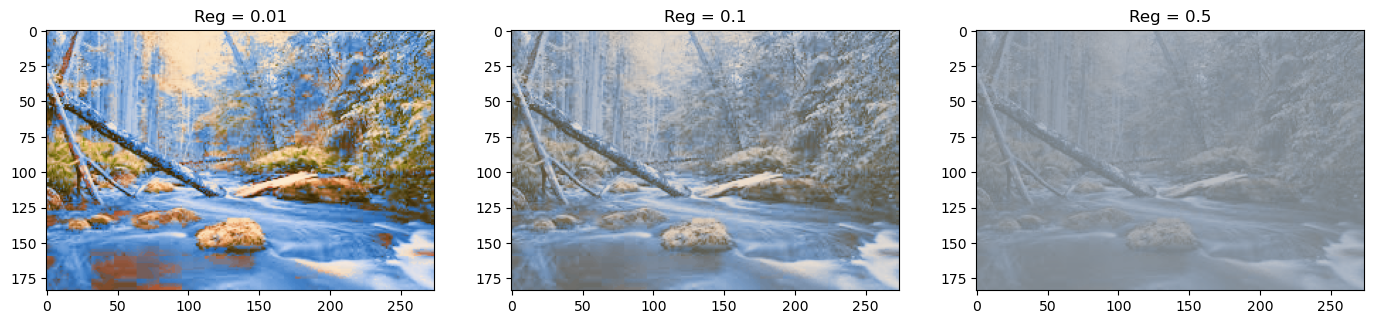

In [244]:
fig = plt.figure(figsize=(17, 20))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(I2)
ax.set_title('Target', fontsize=12)

ax = fig.add_subplot(1, 3, 2)
ax.imshow(I1)
ax.set_title('Source', fontsize=12)


ax = fig.add_subplot(2, 3, 4)
#ax.imshow(I1)
ax.imshow(mat2im(kmeans2.cluster_centers_[kmeans2.labels_],I2.shape))
ax.set_title('subsampled Target', fontsize=12)

ax = fig.add_subplot(2, 3, 5)
ax.imshow(mat2im(kmeans1.cluster_centers_[kmeans1.labels_],I1.shape))
ax.set_title('subsampled Source', fontsize=12)

ax = fig.add_subplot(2, 3, 6)
I = colorTransfer(OT_plans[0], kmeans1, kmeans2, I1.shape)
ax.imshow(I)
ax.set_title('Reg = 0', fontsize=12)

plt.show()

fig = plt.figure(figsize=(17, 20))
for i in range(3):
    ax = fig.add_subplot(3, 3, i+1)
    I = colorTransfer(OT_plans[i+1], kmeans1, kmeans2, I1.shape)
    ax.imshow(I)
    ax.set_title('Reg = '+str(regs[i]), fontsize=12)

plt.show()